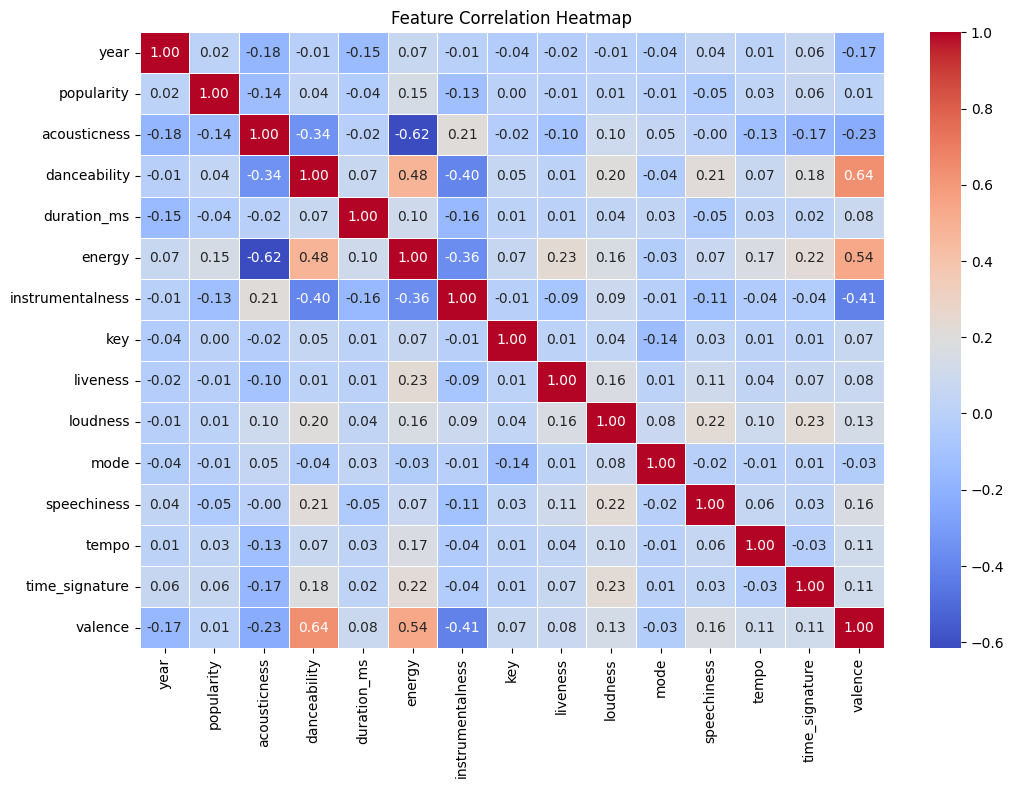

In [4]:
import Word2Vec
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기 (데이터셋 이름에 맞게 수정)
df = pd.read_csv("spotify_tracks.csv")

# 숫자형 변수들만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
corr = numeric_df.corr()

# Heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

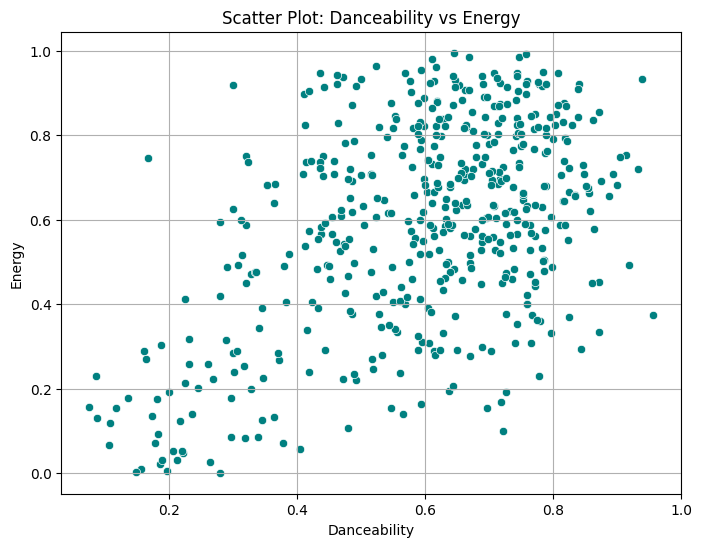

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("spotify_tracks.csv")  # 경로에 맞게 파일 이름 수정

# 결측치 제거 (중요!)
df = df[['danceability', 'energy']].dropna()

# 랜덤 샘플링 (예: 500개)
sample_df = df.sample(n=500, random_state=42)  # random_state로 재현성 확보

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_df, x='danceability', y='energy', color='teal')
plt.title("Scatter Plot: Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

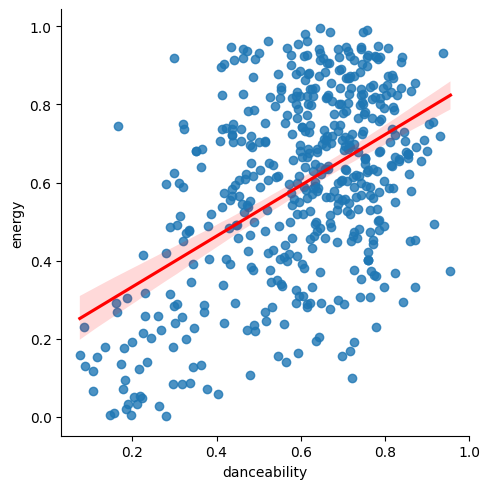

In [9]:
sns.lmplot(data=sample_df, x='danceability', y='energy', line_kws={'color': 'red'})

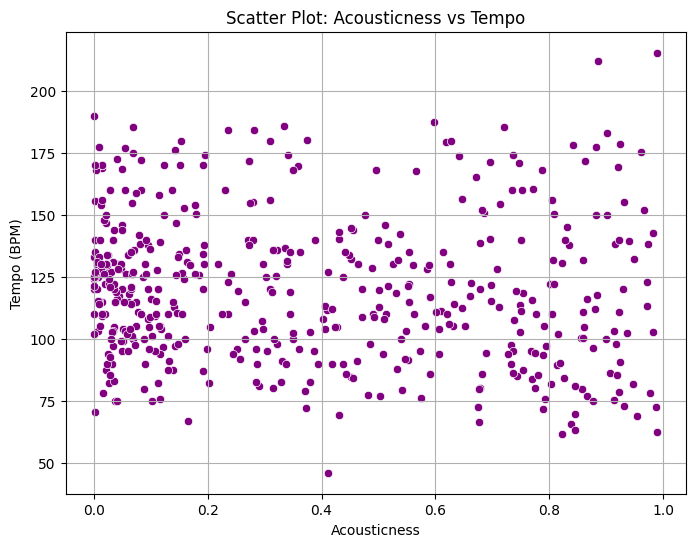

Acousticness와 Tempo의 상관계수: -0.098


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("spotify_tracks.csv")  # 파일명은 데이터셋에 맞게 수정

# 필요한 컬럼 추출 & 결측치 제거
df = df[['acousticness', 'tempo']].dropna()

# 랜덤 샘플링 (예: 500개)
sample_df = df.sample(n=500, random_state=42)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_df, x='acousticness', y='tempo', color='purple')
plt.title("Scatter Plot: Acousticness vs Tempo")
plt.xlabel("Acousticness")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.show()

# 상관계수 출력
corr_value = sample_df['acousticness'].corr(sample_df['tempo'])
print(f"Acousticness와 Tempo의 상관계수: {corr_value:.3f}")

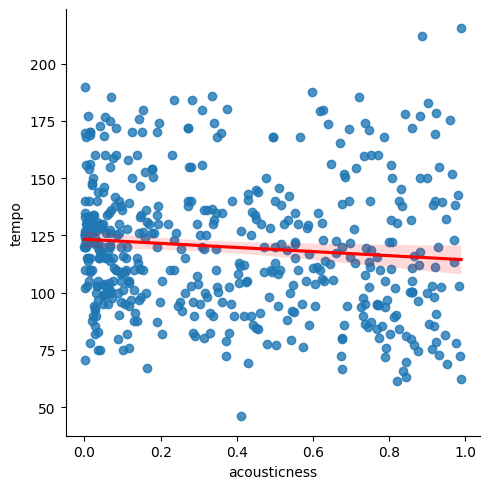

In [11]:
sns.lmplot(data=sample_df, x='acousticness', y='tempo', line_kws={'color': 'red'})

# 라이브러리 import

In [60]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gensim.models import Word2Vec

# 데이터 불러오기

In [133]:
df = pd.read_csv('spotify_tracks.csv')

In [134]:
df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


# 데이터 임베딩

In [135]:
# Null 제거
df = df.dropna(subset=['artist_name', 'language'])

# Artist_name 토큰화 Word2Vec 임베딩 적용
artist_sentences = [[name] for name in df['artist_name']]
artist_model = Word2Vec(
    sentences=artist_sentences,
    vector_size=20,
    window=2,
    min_count=1,
    sg=1,
    workers=4,
    seed=42,
    epochs=60
)

# Artist_name 벡터화
artist_vectors = df['artist_name'].apply(lambda x: artist_model.wv[x])
artist_embeddings = np.vstack(artist_vectors.values)

lang_sentences = [[lang] for lang in df['language']]
lang_model = Word2Vec(
    sentences=lang_sentences,
    vector_size=100,
    window=1,
    min_count=1,
    sg=1,
    workers=4,
    seed=42,
    epochs=60
)
lang_vectors = df['language'].apply(lambda x: lang_model.wv[x])
lang_embeddings = np.vstack(lang_vectors.values)
# lang_embeddings = pd.get_dummies(df['language'], prefix='lang')

# feature selection

In [136]:
numeric_features = ['popularity', 'acousticness', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'tempo', 'valence']

feature merge

In [148]:
X_numeric = df[numeric_features].values
# 전체 feature 합치기
X = np.hstack([artist_embeddings, lang_embeddings * 0.1, X_numeric])

feature normalization

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 차원 축소
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(X_scaled)

# Clustering

In [ ]:
inertia = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(reduced_features)  # X_scaled는 전처리된 데이터
    inertia.append(kmeans.inertia_)
    print(k)
    print("Silhouette Score:", silhouette_score(X_scaled, clusters))
    # print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters))
    # print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters))
    print("---------------------------------------")

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [150]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(reduced_features)
df['cluster'] = clusters

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters))

Silhouette Score: 0.5580706916231276
Calinski-Harabasz Index: 36847.76169965745
Davies-Bouldin Index: 0.6322927017649036


In [151]:
dbscan = DBSCAN(eps=0.5, min_samples=7)
clusters_dbscan = dbscan.fit_predict(reduced_features)
df['cluster'] = clusters_dbscan
print("Silhouette Score:", silhouette_score(X_scaled, clusters_dbscan))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, clusters_dbscan))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters_dbscan))

Silhouette Score: 0.5592813660356473
Calinski-Harabasz Index: 29115.664147455136
Davies-Bouldin Index: 0.7108925710860555


# PCA

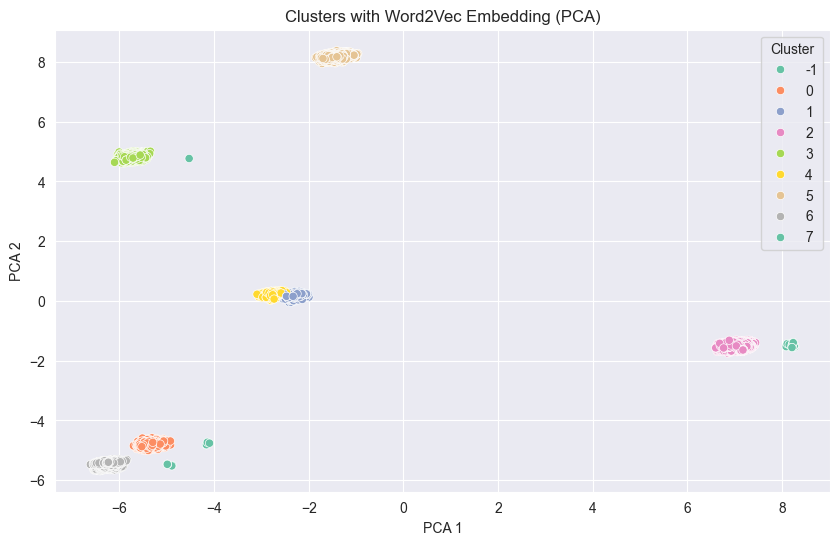

In [152]:
# PCA 시각화
pca_vi = PCA(n_components=2)
X_pca = pca_vi.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters with Word2Vec Embedding (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [153]:
def recommend_songs(artist_name, language, numeric_input,
                    artist_model=artist_model, lang_model=lang_model,
                    scaler=scaler, pca=pca, kmeans=kmeans, df=df, num_recommendations=5):
    try:
        artist_vec = artist_model.wv[artist_name]
    except KeyError:
        print(f"⚠️ Warning: Artist '{artist_name}' not found in vocabulary. Using zero vector.")
        artist_vec = np.zeros(artist_model.vector_size)
    artist_vec = artist_vec.reshape(1, -1)

    try:
        lang_vec = lang_model.wv[language]
    except KeyError:
        print(f"⚠️ Warning: Language '{language}' not found in vocabulary. Using zero vector.")
        lang_vec = np.zeros(lang_model.vector_size)
    lang_vec = lang_vec.reshape(1, -1)

    numeric_input = np.array(numeric_input).reshape(1, -1)

    # 전체 feature 합치기
    input_feature = np.hstack([artist_vec, lang_vec, numeric_input])
    # input_feature = np.hstack([artist_vec, numeric_input])
    input_scaled = scaler.transform(input_feature)
    input_reduced = pca.transform(input_scaled)

    # 클러스터 예측
    cluster_id = kmeans.predict(input_reduced)
    print(f"🎯 예측된 클러스터: {cluster_id[0]}")

    # 해당 클러스터에서 무작위 추천
    cluster_songs = df[df['cluster'] == cluster_id[0]]
    recommendations = cluster_songs.sample(
        n=min(num_recommendations, len(cluster_songs)),
        random_state=None  # 무작위 추천 (고정 없음)
    )

    return recommendations[['track_name', 'artist_name', 'track_url']]

In [154]:
#['popularity', 'acousticness', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'tempo', 'valence']
# 다양한 새로운 입력 예시
new_inputs = [
    {"artist_name": "아이유", "language": "Korean", "numeric_input": [85, 0.1, 0.7, 0.8, 6, -4, 0.04, 130, 0.85]}, # K-Pop 스타일
    {"artist_name": "Ed Sheeran", "language": "English", "numeric_input": [75, 0.07, 0.5, 0.6, 8, -6, 0.03, 110, 0.6]}, # 어쿠스틱 팝 스타일
    {"artist_name": "Bad Bunny", "language": "English", "numeric_input": [92, 0.05, 0.9, 0.95, 1, -3, 0.08, 140, 0.98]}, # 라틴 댄스 스타일
    {"artist_name": "BTS", "language": "Korean", "numeric_input": [88, 0.2, 0.75, 0.88, 9, -3.5, 0.05, 135, 0.82]}, # J-Pop 스타일
    {"artist_name": "Stromae", "language": "Korean", "numeric_input": [70, 0.3, 0.8, 0.7, 4, -5, 0.06, 120, 0.78]}, # 팝 스타일
    {"artist_name": "周杰伦", "language": "English", "numeric_input": [80, 0.4, 0.65, 0.65, 7, -7, 0.07, 100, 0.55]}, # C-Pop 스타일
    {"artist_name": "Ludwig van Beethoven", "language": "English", "numeric_input": [60, 0.9, 0.2, 0.1, 3, -20, 0.02, 80, 0.15]}, # 클래식 스타일 (어휘에 없을 가능성 높음)
]

print("다양한 입력에 대한 클러스터 예측:")
for i, new_input in enumerate(new_inputs):
    print(f"\n--- 입력 {i+1} ---")
    print(f"아티스트: {new_input['artist_name']}, 언어: {new_input['language']}, 특징: {new_input['numeric_input']}")
    recommendations = recommend_songs(
        new_input['artist_name'],
        new_input['language'],
        new_input['numeric_input'],
        artist_model,
        lang_model,
        scaler,
        pca,
        kmeans,
        df
    )
    print("추천된 곡 (처음 5개):")
    print(recommendations.head())

다양한 입력에 대한 클러스터 예측:

--- 입력 1 ---
아티스트: 아이유, 언어: Korean, 특징: [85, 0.1, 0.7, 0.8, 6, -4, 0.04, 130, 0.85]
⚠️ Warning: Artist '아이유' not found in vocabulary. Using zero vector.
🎯 예측된 클러스터: 3
추천된 곡 (처음 5개):
                                              track_name  \
7962   Tomake Chuye Dilam Male Version - From "Bastus...   
8673                                           Judaiyaan   
7677                                         Mere Yaaraa   
14602                      Tu Hi Junoon (From "Dhoom:3")   
48042                                            Players   

                                             artist_name  \
7962                                        Arijit Singh   
8673                                           Javed Ali   
7677                           Arijit Singh, Neeti Mohan   
14602  Pritam, Mohit Chauhan, Kausar Munir, Pritam,Mo...   
48042                Badshah, Karan Aujla, Devika Badyal   

                                               track_url  
7962   https://o